
# Lab3: Python Control Systems Library



This lab introduces the basics of Python Control Systems Library, or python-control, a powerful open-source package for modeling, analyzing, and simulating control systems. The library supports both linear and nonlinear systems, providing tools for state-space and transfer function representations, system linearization, time and frequency response analysis, and visualization (such as phase portraits and step responses). The official documentation for this can be found at: https://python-control.readthedocs.io/en/0.10.2/


**What you'll practice in this lab**
- Build and simulate **state-space models**.
- Analyze **time responses** using python-control tools.
- Explore **nonlinear system modeling**.
- Perform **system linearization** and compare linear vs. nonlinear responses.
- Visualize and interpret **step, impulse, ramp, and sinusoidal responses**.

## Setup (run once per environment)
We first need to install `python-control` (and import required libraries) **every time you open this notebook**, to ensure all dependencies are available in your current environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import the python-control package
try:
    import control as ctl # ctl is the alias for control
    print("python-control", ctl.__version__)
except ImportError:
    %pip install control
    import control as ctl

%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['axes.grid'] = True

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 5.7 MB/s eta 0:00:00


---
## Task 1: Coupled mass spring system

In this task, we will model, simulate, and analyze the dynamics of the following coupled mass-spring system using the Python Control Systems Library. We will construct the state-space representation, explore the system's time-domain responses (such as initial and step responses), and investigate how the system behaves under different initial conditions and external inputs. This will provide insight into the fundamental properties of multi-degree-of-freedom mechanical systems and demonstrate key analysis tools for linear systems.

<center><img src="https://www.cds.caltech.edu/~murray/courses/cds110/sp2024/springmass-coupled.png" width=640></center>


### System dynamics

The dynamics of the system can be written as

$$
\begin{aligned}
  m \ddot{q}_1 &= -2 k q_1 - c \dot{q}_1 + k q_2, \\
  m \ddot{q}_2 &= k q_1 - 2 k q_2 - c \dot{q}_2 + ku
\end{aligned}
$$

or in state space form, with state vector $x = [x_1,\, x_2,\, x_3,\, x_4]^T$ where
- $x_1 = q_1$ (position of mass 1)
- $x_2 = q_2$ (position of mass 2)
- $x_3 = \dot{q}_1$ (velocity of mass 1)
- $x_4 = \dot{q}_2$ (velocity of mass 2)
  
and output of $y= [q_1, q_2]^T$

$$
\begin{aligned}
    \dfrac{dx}{dt} &= \begin{bmatrix}
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 1 \\[0.5ex]
        -\dfrac{2k}{m} & \dfrac{k}{m} & -\dfrac{c}{m} & 0 \\[0.5ex]
        \dfrac{k}{m} & -\dfrac{2k}{m} & 0 & -\dfrac{c}{m}
    \end{bmatrix} x
    + \begin{bmatrix}
        0 \\ 0 \\[0.5ex] 0 \\[1ex] \dfrac{k}{m}
    \end{bmatrix} u, \\[2ex]
    y &= \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0
    \end{bmatrix} x
\end{aligned}
$$



In [2]:
# Define the parameters for the system
m, c, k = 1, 0.1, 2
# Create a linear system
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [-2*k/m, k/m, -c/m, 0],
    [k/m, -2*k/m, 0, -c/m]
])
B = np.array([[0], [0], [0], [k/m]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
D = 0

# Create a state-space system using A, B, C, D
# https://python-control.readthedocs.io/en/0.10.2/generated/control.ss.html
sys = ctl.ss(A, B, C, D, outputs=['q1', 'q2'], name="coupled spring mass")
print(sys)

<StateSpace>: coupled spring mass
Inputs (1): ['u[0]']
Outputs (2): ['q1', 'q2']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 0.   0.   1.   0. ]
     [ 0.   0.   0.   1. ]
     [-4.   2.  -0.1  0. ]
     [ 2.  -4.   0.  -0.1]]

B = [[0.]
     [0.]
     [0.]
     [2.]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]]

D = [[0.]
     [0.]]


### Initial response

The `initial_response` function can be used to compute the response of the system with no input, but starting from a given initial condition.  This function returns a response object, which can be used for plotting.

> **Note:** "No input" here means the input $u(t) = 0$ for all $t$. So, the initial response is the system's behavior due solely to its initial state.

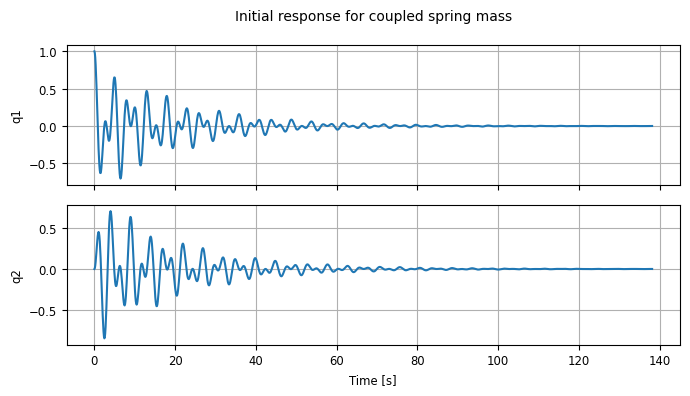

In [ ]:
# Initial condition response
response = ctl.initial_response(sys, X0=[1, 0, 0, 0])
cplt = response.plot()
# The response only includes q1 and q2 only the first two states (q1 and q2) are outputs of the system.
# q3 and q4 (the velocities) are not included in the outputs, so they are not shown in the response plot.

If you want to change the default way the data are plotted, you can also use the response object to get direct access to the states and outputs.

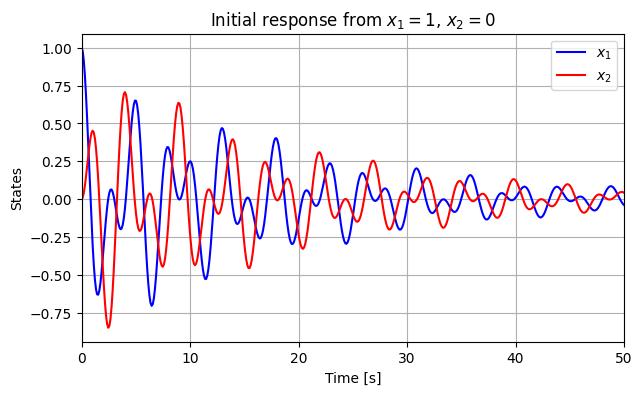

In [ ]:
# Plot the outputs of the system on the same graph, in different colors
t = response.time
x = response.states
plt.plot(t, x[0], 'b', t, x[1], 'r')
plt.legend(['$x_1$', '$x_2$'])
plt.xlim(0, 50)
plt.ylabel('States')
plt.xlabel('Time [s]')
plt.title("Initial response from $x_1 = 1$, $x_2 = 0$");

There are also lots of options available in `initial_response` and `.plot()` for tuning the plots that you get.

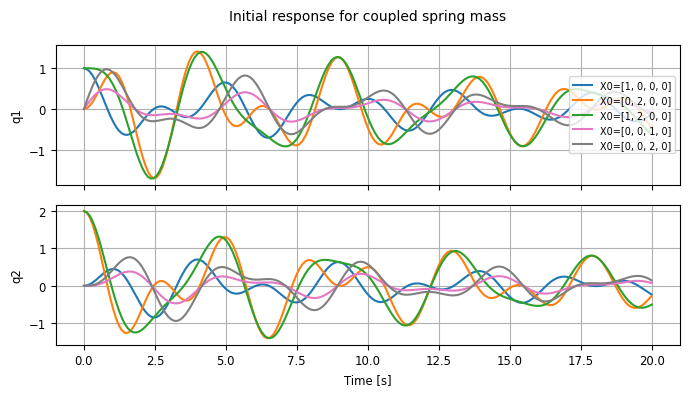

In [ ]:
for X0 in [[1, 0, 0, 0], [0, 2, 0, 0], [1, 2, 0, 0], [0, 0, 1, 0], [0, 0, 2, 0]]:
  response = ctl.initial_response(sys, T=20, X0=X0)
  response.plot(label=f"{X0=}")

### Step response

Similar to `initial_response`, you can also generate a step response for a linear system using the `step_response` function, which returns a time  response object:

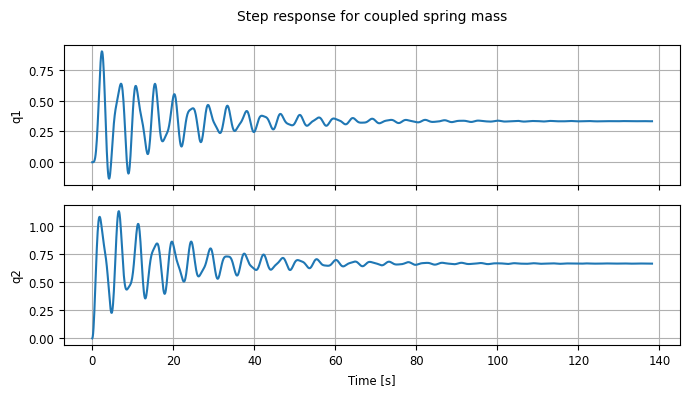

In [ ]:
cplt = ctl.step_response(sys).plot()

We can analyze the properties of the step response using the `stepinfo` command:

In [ ]:
step_info = ctl.step_info(sys)
print("rise time = ",
      step_info[0][0]['RiseTime'], "seconds\n") #[0][0] to access the first output's rise time
step_info # A dictionary of all step response characteristics

rise time =  0.6153902252990775 seconds



[[{'RiseTime': 0.6153902252990775,
   'SettlingTime': 89.02645259326653,
   'SettlingMin': -0.13272845655369328,
   'SettlingMax': 0.9005994876222033,
   'Overshoot': 170.179846286661,
   'Undershoot': 39.81853696610799,
   'Peak': 0.9005994876222033,
   'PeakTime': 2.3589958636464634,
   'SteadyStateValue': 0.3333333333333333}],
 [{'RiseTime': 0.6153902252990775,
   'SettlingTime': 73.6416969607896,
   'SettlingMin': 0.22760198207822407,
   'SettlingMax': 1.1338933771021489,
   'Overshoot': 70.08400656532234,
   'Undershoot': 0.0,
   'Peak': 1.1338933771021489,
   'PeakTime': 6.564162403190159,
   'SteadyStateValue': 0.6666666666666666}]]

Note that by default the inputs are not included in the step response plot (since they are a bit boring), but you can change that:

stepresp.time.shape=(1348,)
stepresp.inputs.shape=(1, 1, 1348)
stepresp.states.shape=(4, 1, 1348)
stepresp.outputs.shape=(2, 1, 1348)


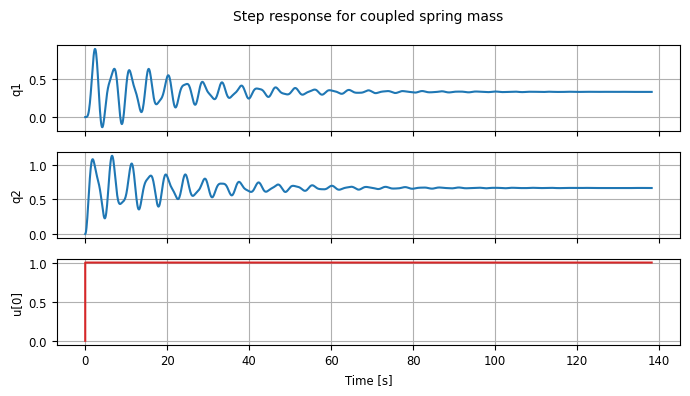

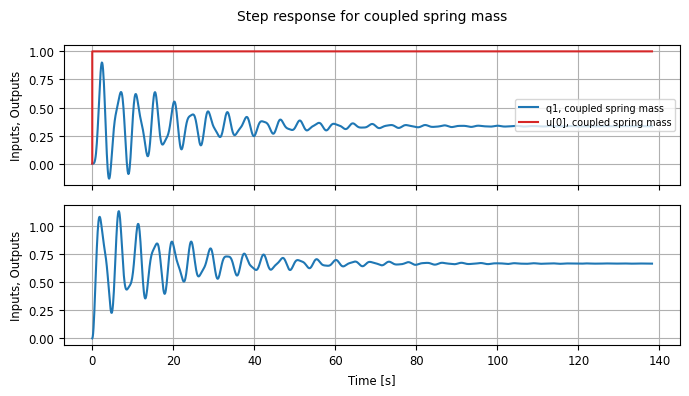

In [ ]:
stepresp = ctl.step_response(sys)
cplt = stepresp.plot(plot_inputs=True)

# Plot the inputs on top of the outputs: only overlay on the first output
cplt = stepresp.plot(plot_inputs='overlay')

# Look at the "shape" of the step response
print(f"{stepresp.time.shape=}")
print(f"{stepresp.inputs.shape=}")
print(f"{stepresp.states.shape=}")
print(f"{stepresp.outputs.shape=}")

### Forced response

To compute the response to a given input, we can use the `forced_response` function:

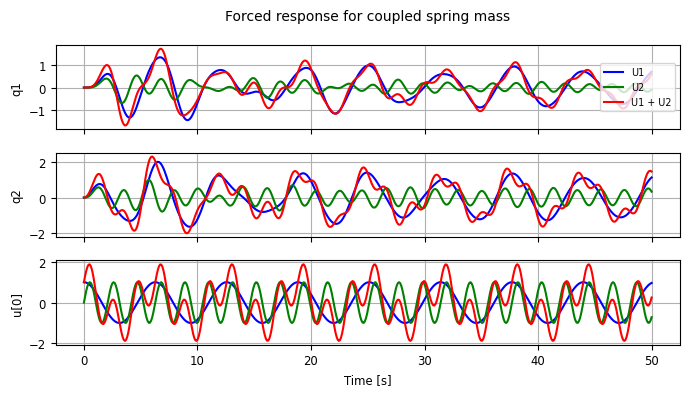

In [ ]:
T = np.linspace(0, 50, 500)
U1 = np.cos(T) # input 1
U2 = np.sin(3 * T) # input 2

resp1 = ctl.forced_response(sys, T, U1)
resp2 = ctl.forced_response(sys, T, U2)
resp3 = ctl.forced_response(sys, T, U1 + U2)

# Plot the individual responses
resp1.sysname = 'U1'; resp1.plot(color='b')
resp2.sysname = 'U2'; resp2.plot(color='g')
resp3.sysname = 'U1 + U2'; resp3.plot(color='r');

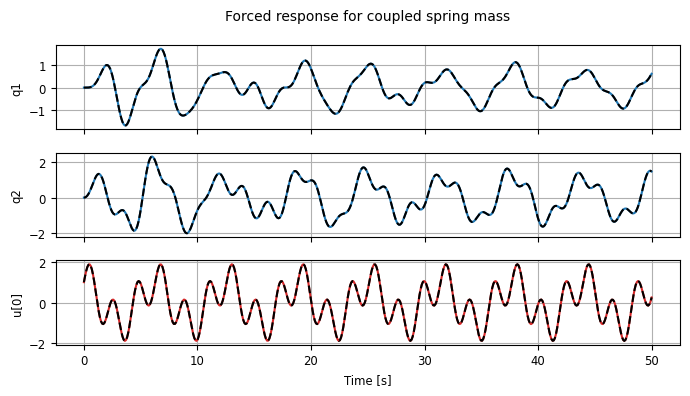

In [ ]:
# Show that the system response is linear
cplt = resp3.plot()
cplt.axes[0, 0].plot(resp1.time, resp1.outputs[0] + resp2.outputs[0], 'k--')
cplt.axes[1, 0].plot(resp1.time, resp1.outputs[1] + resp2.outputs[1], 'k--')
cplt.axes[2, 0].plot(resp1.time, resp1.inputs[0] + resp2.inputs[0], 'k--');

More details about time response for LTI system can be found at
https://python-control.readthedocs.io/en/0.10.2/response.html#time-response-data

---
## Task 2 — Pendulum System

In this task, we will use the Python control Library's [nlsys](https://python-control.readthedocs.io/en/0.10.2/generated/control.nlsys.html#control.nlsys) that can create a nonlinear input/output system. We will use the pendulum example with control input

$$
\begin{align}
\dot{x}_1 &= x_2 \\
\dot{x}_2 &= -\frac{g}{L}\sin x_1 - \frac{b}{mL^2}\,x_2 + \frac{u}{mL^2}
\end{align}
$$

where:
- $x_1 = \theta$ (angle)
- $x_2 = \dot{\theta}$ (angular velocity)
- $g = 9.81\,\text{m/s}^2$
- $m = 1 \,\text{kg}$
- $L = 1\,\text{m}$
- $b = 1.5$ (N.m.s/rad, damping coefficient)

Assume the output $y=x_1$, and control input $u$, we can create the system using [`nlsys`](https://python-control.readthedocs.io/en/0.10.2/generated/control.nlsys.html) function, which constructs a nonlinear system model. Its key parameters are:
- `update`: function defining the state update law (system dynamics or state equation)
- `output`: function defining the output equation
- `params`: dictionary of system parameters
- `states`: list of state variable names
- `inputs`: list of input variable names
- `outputs`: list of output variable names
- `name`: (optional) system name

### Create the system
We can follow three steps to create the system

**Step 1:** Define the system parameters in a dictionary (e.g., gravity, mass, length, damping).

**Step 2:** Implement the state update function and output function using these parameters.

**Step 3:** Create the nonlinear system object using `ctl.nlsys`, passing the functions, parameters, and variable names.

In [ ]:
# Parameter values for pendulum
pendulum_params = {
    'g': 9.81,            # Gravitational acceleration (m/s^2)
    'L': 1.0,             # Pendulum length (m)
    'b': 1.5,             # Damping coefficient (N.m.s/rad)
    'm': 1.0,             # Pendulum mass (kg)
}

# State derivative for pendulum
def pendulum_update(t, x, u, params):
    # Extract the configuration and velocity variables from the state vector
    theta = x[0]                # Angular position of the pendulum
    thetadot = x[1]             # Angular velocity of the pendulum
    tau = u[0]                  # Torque applied at the pivot

    # Get the parameter values
    g, L, b, m = map(params.get, ['g', 'L', 'b', 'm'])

    # Compute the angular acceleration using pendulum dynamics
    # x_dot_1 = x_2
    # x_dot_2 = -g/L * sin(x_1) - b/(m*L^2) * x_2 + u/(m*L^2)
    dthetadot = -g/L * np.sin(theta) - b/(m*L**2) * thetadot + tau/(m*L**2)

    # Return the state update law
    return np.array([thetadot, dthetadot])

# System output (angle only, as specified y = x_1)
def pendulum_output(t, x, u, params):
    return np.array([x[0]])  # Output y = theta (x_1)

# create the nonlinear system using nlsys
pendulum = ctl.nlsys(
    pendulum_update, pendulum_output, name='pendulum',
    params=pendulum_params, states=['theta_', 'thdot_'],
    outputs=['y'], inputs=['tau'])

print(pendulum)
print("\nParams:", pendulum.params)

<NonlinearIOSystem>: pendulum
Inputs (1): ['tau']
Outputs (1): ['y']
States (2): ['theta_', 'thdot_']
Parameters: ['g', 'L', 'b', 'm']

Update: <function pendulum_update at 0x79be97f05da0>
Output: <function pendulum_output at 0x79be97f05a80>

Params: {'g': 9.81, 'L': 1.0, 'b': 1.5, 'm': 1.0}


After the system is created, we can use several existing functions in the library to invesitgate its dynamic behaviror, perform linearization, etc.

### Phase Portraits

We will first see how to create the **phase portrait** for the pendulum system. The portrait shows how the angle ($\theta$) and angular velocity ($\dot{\theta}$) evolve over time for different initial conditions. This visualization helps us understand the system's stability, equilibrium points, and overall behavior.

Below is sample code to plot the phase portrait for the pendulum using the `python-control` library:


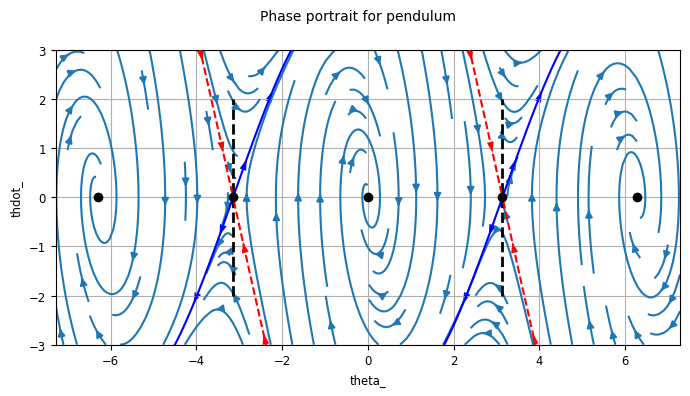

In [ ]:
# Create phase portrait using python-control's built-in function
# Plot the phase plane with specified limits and grid points
# phase_plane_plot(system, xlim, ylim, grid_points)
axis_limits = [-2*np.pi - 1, 2*np.pi + 1, -3, 3]
ctl.phase_plane_plot(
    pendulum, axis_limits)

# Draw lines at the downward equilibrium angles (unstable equilibria)
plt.plot([-np.pi, -np.pi], [-2, 2], 'k--', linewidth=2, label='Unstable equilibria')
plt.plot([np.pi, np.pi], [-2, 2], 'k--', linewidth=2)


### Linearization

To study the open loop dynamics of the system, we compute the linearization of the dynamics about the operating point corresponding to $\theta_\text{d}=x_{1d} = y_d=15^\circ$.

In [ ]:
# Convert the equilibrium angle to radians
theta_d = (85 / 180) * np.pi

# For the pendulum, the equilibrium torque needed to hold position theta_d is:
# tau_d = m*g*L*sin(theta_d)
g, L, m = map(pendulum.params.get, ['g', 'L', 'm'])
u_d = m * g * L * np.sin(theta_d)
print("Equilibrium torque = %g N.m" % u_d)

# Linearize the system about the operating point
# https://python-control.readthedocs.io/en/0.10.2/generated/control.linearize.html
P = pendulum.linearize([theta_d, 0], u_d)
print("Linearized dynamics:\n", P)

Equilibrium torque = 9.77267 N.m
Linearized dynamics:
 <StateSpace>: sys[19]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.          1.        ]
     [-0.85499295 -1.5       ]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]


### Open loop step response

We use the `step_response` function to plot the step response of the linearized, open-loop system and compute the "rise time" and "settling time"

Rise time: 0.40753718454375126
Settling time: 4.6459239037987645
Step Response Characteristics:
RiseTime: 0.4075
SettlingTime: 4.6459
SettlingMin: 0.0838
SettlingMax: 0.1535
Overshoot: 45.4088
Undershoot: 0.0000
Peak: 0.1535
PeakTime: 1.0596
SteadyStateValue: 0.1055


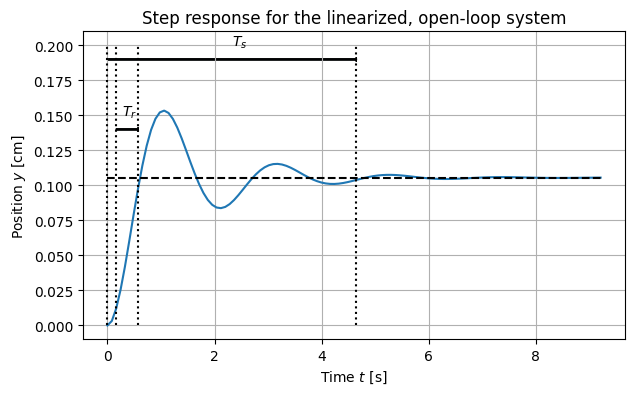

In [ ]:
# Compute the step response
lin_response = ctl.step_response(P)
timepts, output = lin_response.time, lin_response.outputs # obtain time and output arrays

# Plot step response (input 0 to output 0)
plt.plot(timepts, output)
plt.xlabel("Time $t$ [s]")
plt.ylabel("Position $y$ [cm]")
plt.title("Step response for the linearized, open-loop system")

# Compute and print selected properties of the step response
results = ctl.step_info(P)
print("Rise time:", results['RiseTime'])              # 10-90% rise time
print("Settling time:", results['SettlingTime'])      # 2% error

# Print all response characteristics
print("Step Response Characteristics:")
print("=" * 35) # print a line of '=' for emphasis
for key, value in results.items():
    if value is not None: # some values may be None
        print(f"{key}: {value:.4f}") # formatted to 4 decimal places

# Calculate the rise time start time by hand
rise_time_start = timepts[np.where(output > 0.1 * output[-1])[0][0]]
rise_time_stop = rise_time_start + results['RiseTime']

# Add lines for the step response features
plt.plot([timepts[0], timepts[-1]], [output[-1], output[-1]], 'k--')

plt.plot([rise_time_start, rise_time_start], [0, 0.2], 'k:')# 10% line
plt.plot([rise_time_stop, rise_time_stop], [0, 0.2], 'k:') # 90% line
plt.arrow(rise_time_start, 0.14, rise_time_stop - rise_time_start, 0) # rise time arrow
plt.text((rise_time_start + rise_time_stop)/2-0.1, 0.15, '$T_r$') # rise time text

plt.plot([0, 0], [0, 0.2], 'k:') # 0% line
plt.plot([results['SettlingTime'], results['SettlingTime']], [0, 0.2], 'k:') # settling time line
plt.arrow(0, 0.19, results['SettlingTime'], 0)
plt.text(results['SettlingTime']/2, 0.2, '$T_s$');


We see that the open loop step response (for the linearized system) is stable, and that the final value is less than 1 (this value just depends on the parameters in the system).

We can also compare the response of the linearized system to the full nonlinear system:

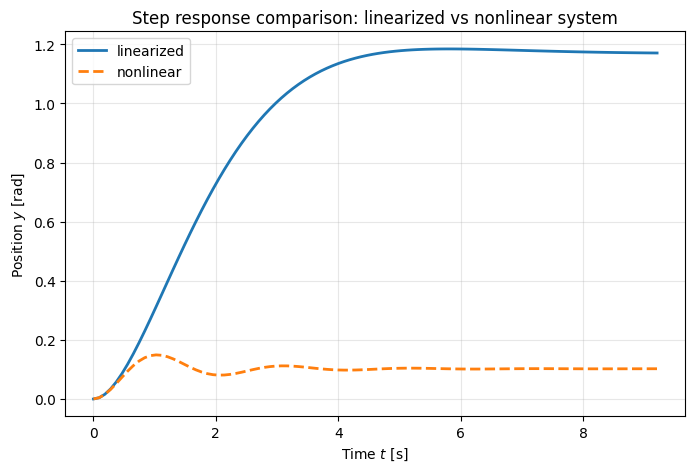

Linearized final value: 1.1709 rad
Nonlinear final value: 0.1022 rad
Difference: 1.0687 rad


In [ ]:
# Simulate nonlinear system with same time points and input
# Need to specify initial condition and proper input format
nl_response = ctl.input_output_response(pendulum, timepts, U=1)

# Plot step response comparison
plt.figure(figsize=(8, 5))
plt.plot(timepts, output, label="linearized", linewidth=2) # linearized response
plt.plot(timepts, nl_response.outputs.squeeze(), label="nonlinear", linewidth=2, linestyle='--') # nonlinear response

plt.xlabel("Time $t$ [s]")
plt.ylabel("Position $y$ [rad]")
plt.title("Step response comparison: linearized vs nonlinear system")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print final values for comparison
print(f"Linearized final value: {output[-1]:.4f} rad")
print(f"Nonlinear final value: {nl_response.outputs[-1]:.4f} rad")
print(f"Difference: {abs(output[-1] - nl_response.outputs[-1]):.4f} rad")

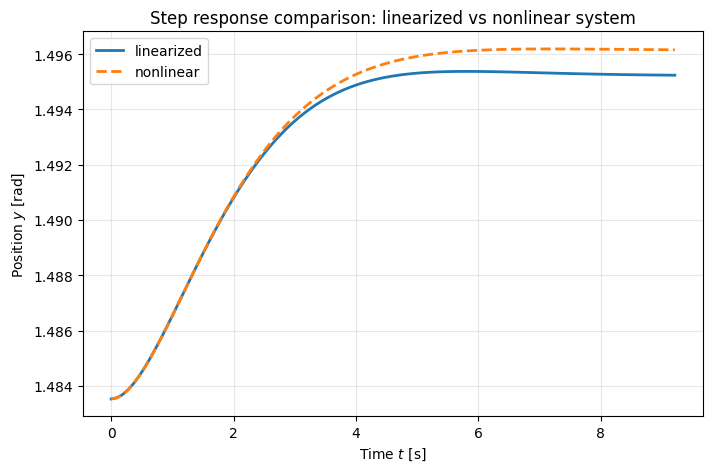

Linearized final value: 1.1709 rad
Nonlinear final value: 1.4962 rad
Difference: 0.3253 rad


In [ ]:
#!!! Updated version for the comparison !!!
# For linearized system - step response (this is already a perturbation)
lin_response = ctl.step_response(P)
timepts, output = lin_response.time, lin_response.outputs

# For nonlinear system - apply the SAME perturbation
# The nonlinear system needs: equilibrium input + step perturbation
step_magnitude = 0.01  # Same as linearized system
u_nonlinear = np.ones_like(timepts) * (u_d + step_magnitude)  # u_d + step

# Simulate nonlinear system starting from equilibrium with perturbed input
nl_response = ctl.input_output_response(
    pendulum, timepts,
    U = u_nonlinear,  # equilibrium + perturbation
    X0 = [theta_d, 0], # start from equilibrium
)

# Plot step response comparison
plt.figure(figsize=(8, 5))
# linearized response: note we start from the equilibrium position and scale the output by the step magnitude: step_magnitude*output+theta_d
plt.plot(timepts, step_magnitude*output+theta_d, label="linearized", linewidth=2)
# nonlinear response
plt.plot(timepts, nl_response.outputs.squeeze(), label="nonlinear", linewidth=2, linestyle='--')

plt.xlabel("Time $t$ [s]")
plt.ylabel("Position $y$ [rad]")
plt.title("Step response comparison: linearized vs nonlinear system")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print final values for comparison
print(f"Linearized final value: {output[-1]:.4f} rad")
print(f"Nonlinear final value: {nl_response.outputs[-1]:.4f} rad")
print(f"Difference: {abs(output[-1] - nl_response.outputs[-1]):.4f} rad")

Explore additional time domain analysis capabilities.

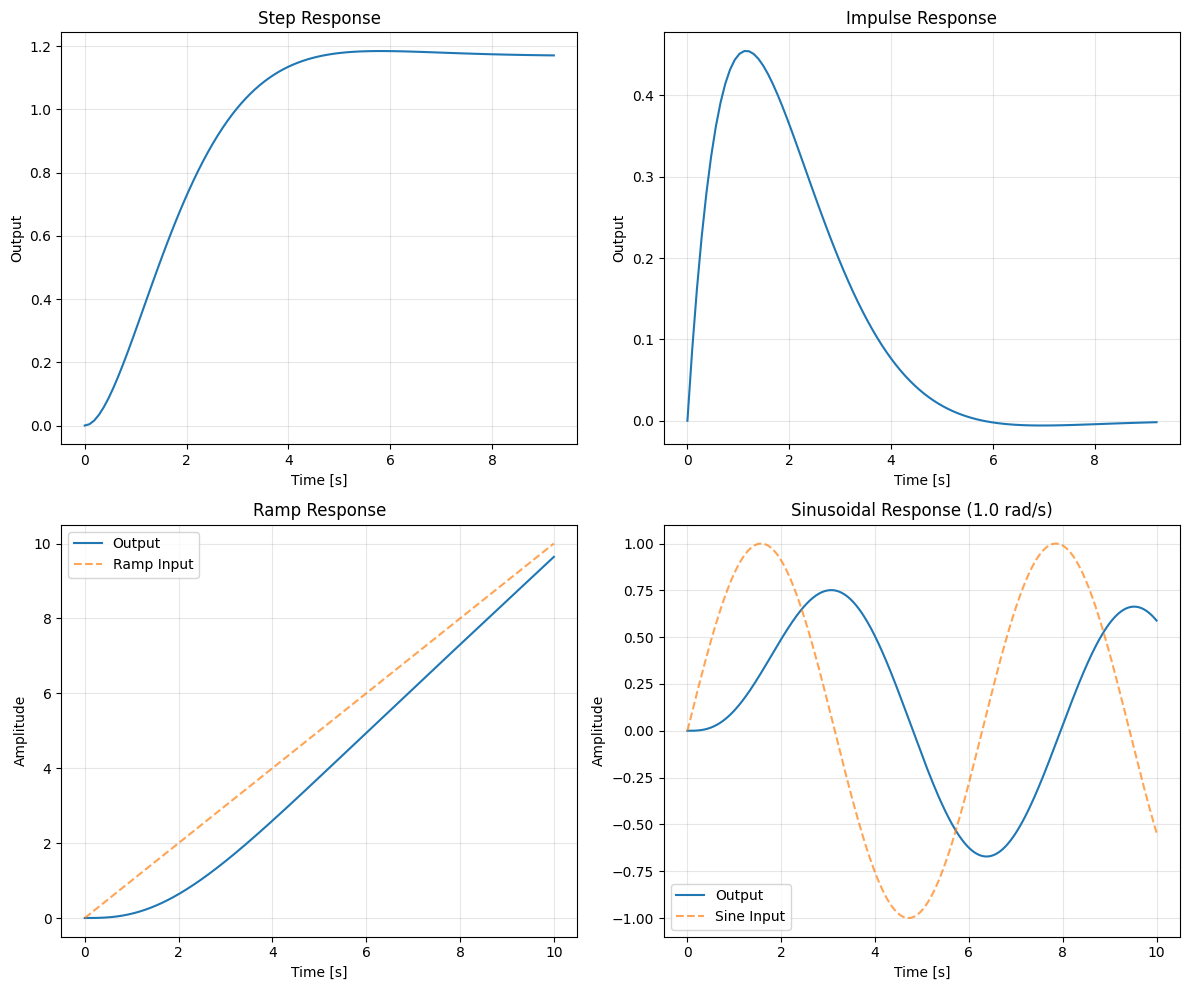

In [ ]:
# Different input responses
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Step response (already computed)
axes[0,0].plot(timepts, output)
axes[0,0].set_title('Step Response')
axes[0,0].set_xlabel('Time [s]')
axes[0,0].set_ylabel('Output')
axes[0,0].grid(True, alpha=0.3)

# 2. Impulse response
t_imp, y_imp = ctl.impulse_response(P)
axes[0,1].plot(t_imp, y_imp)
axes[0,1].set_title('Impulse Response')
axes[0,1].set_xlabel('Time [s]')
axes[0,1].set_ylabel('Output')
axes[0,1].grid(True, alpha=0.3)

# 3. Ramp response (using forced_response)
t_ramp = np.linspace(0, 10, 1000)
u_ramp = t_ramp  # Ramp input
t_ramp_resp, y_ramp = ctl.forced_response(P, t_ramp, u_ramp)
axes[1,0].plot(t_ramp_resp, y_ramp, label='Output')
axes[1,0].plot(t_ramp, u_ramp, '--', alpha=0.7, label='Ramp Input')
axes[1,0].set_title('Ramp Response')
axes[1,0].set_xlabel('Time [s]')
axes[1,0].set_ylabel('Amplitude')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Sinusoidal response
t_sin = np.linspace(0, 10, 1000)
freq = 1.0  # 1 rad/s
u_sin = np.sin(freq * t_sin)
t_sin_resp, y_sin = ctl.forced_response(P, t_sin, u_sin)
axes[1,1].plot(t_sin_resp, y_sin, label='Output')
axes[1,1].plot(t_sin, u_sin, '--', alpha=0.7, label='Sine Input')
axes[1,1].set_title(f'Sinusoidal Response ({freq} rad/s)')
axes[1,1].set_xlabel('Time [s]')
axes[1,1].set_ylabel('Amplitude')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# HW problems

## Problem 1: Servo Mechanism Linearization and Time Response
Consider the same servo mechanism consisting of a spring loaded arm that is driven by a motor, as shown below.

<center><img src="https://www.cds.caltech.edu/~murray/courses/cds110/sp2024/servomech-diagram.png" width=200 alt="servomech-diagram"></center>

The equations of motion for the system are given by
$$
J \ddot \theta = -b \dot\theta - k r\sin\theta + \tau_\text{m},
$$
where
- $J$ is the rotational inertia of the arm (kg·m²)
- $b$ is the viscous damping coefficient (N·m·s/rad)
- $k$ is the linear spring constant (N/m)
- $r$ is the effective radius or lever arm where the spring force acts (m)

Define the state vector $x = [\theta,\, \dot{\theta}]^T$ and output $y = \theta$. The dynamics can be written in state-space form: $\dot{x} = f(x, u)$, $y = g(x, u)$ with $u=\tau_\text{m}$ as

$$
\begin{align*}
\dot{x} &= \begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \end{bmatrix}  =
  \begin{bmatrix} x_2 \\ -k r \sin x_1 / J - bx_2 / J + u/J \end{bmatrix} \\
  y &= x_1
\end{align*}
$$

$$ k = 1,\quad J = 100,\quad b = 10,
    \quad r = 1
$$
   
Answer the following questions (questions 1 and 2 require manual derivation; you may attach a separate PDF):

1. Linearize the system around an operating point $x_d,\, u_d,\, y_d$. You need to manual derive this using
  $$
   A = \frac{\partial f}{\partial x},\quad
   B = \frac{\partial f}{\partial u},\quad
   C = \frac{\partial g}{\partial x},\quad
   D = \frac{\partial g}{\partial u}
   $$

2. Based on the $A$, $B$, $C$, $D$ matrices you have obtained, get the numerical values for two cases $y_d=10^\circ$, $y_d=75^\circ$. Note that you first need to compute the corresponding $x_d$ and $u_d$ for each case. You may use Python to compute the specific matrices.

3. Programming problem: First create the system using nlsys and then linearize the system for two cases $y_d=10^\circ$, $y_d=75^\circ$ using the linearization function. Compare the $A$, $B$, $C$, $D$ matrices with the one you obtain in question 2. They should match.
   
4. Programming problem: Generate the step reponse for the linearized system when $y_d=10^\circ$ and label the rising time and settling time, similar to the pendulum example. You may need to revise the code to show the texts at proper locations in the figure.

5. Programming problem: Plot the step response for the orignal nonlinear system and the two linearized system for both $y_d=10^\circ$ and $y_d=75^\circ$. Compare the results.  




## Problem 2: Cart–Pole Linearization and Time Response

For this problem, we will consider the cart–pole system, which is widely used for demonstrating control concepts. You can see a video for the system in action [here](https://www.youtube.com/watch?v=Bzq96V1yN5k). It consist of a cart of mass $m_c$ and a pole of mass $m_p$ and length $l$ pivoted on the cart. A horizontal force $f_x$ is applied to the cart.

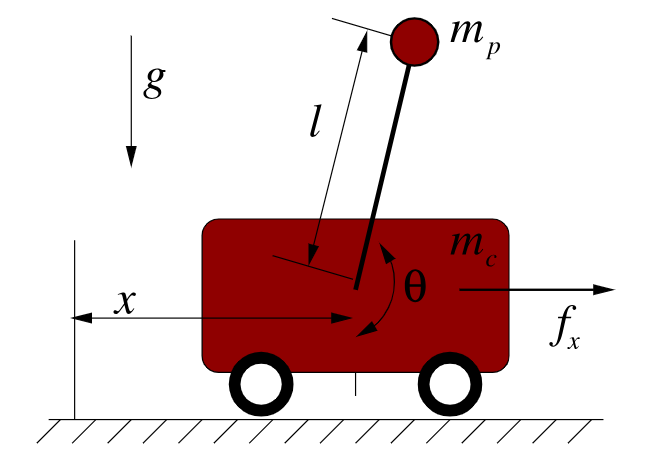

The equations of motion for the system are given by

$$
\ddot{x} = \frac{1}{m_c + m_p \sin^2\theta}
\left[f_x + m_p \sin\theta\big(l\dot{\theta}^2 + g\cos\theta\big)\right]
$$

$$
\ddot{\theta} = \frac{1}{l(m_c + m_p \sin^2\theta)}
\left[-f_x\cos\theta - m_p l\dot{\theta}^2\cos\theta\sin\theta
- (m_c+m_p)g\sin\theta\right]
$$

where  

- $x$: cart position  
- $\theta$: pole angle measured from vertical (counter-clockwise positive)  
- $g$: gravitational constant  
- $f_x$: horizontal force input to the cart  

Define the state vector, output, and control input as  

$$
\mathbf{x} = [\,x,\, \dot{x},\, \theta,\, \dot{\theta}\,]^T,
\quad y = \theta,
\quad u = f_x
$$

so the dynamics can be written as $\dot{x} = f(x, u),\; y = g(x, u)$.

Use the following parameters:

$$
m_c = 1.0,\quad m_p = 0.1,\quad l = 0.5,\quad g = 9.81
$$



1. **State Space form**: Rewrite the sytem into state space form $\dot{x} = f(x, u)$, $y = g(x, u)$ with the state, output, and control input.
   
2. **Manual Linearization**:  Linearize the system around an operating point $(x_d, \dot{x}_d, \theta_d, \dot{\theta}_d, u_d)$.  
   Derive the state-space matrices
   $$
   A = \frac{\partial f}{\partial x},\quad
   B = \frac{\partial f}{\partial u},\quad
   C = \frac{\partial g}{\partial x},\quad
   D = \frac{\partial g}{\partial u}
   $$
   evaluated at the operating point. Show your derivation clearly (attach a PDF if needed).



3. **Equilibria at Different Operating Points**:  Compute the equilibrium input $u_d$ for both:  
   - $\theta_d = 0$ (downward equilibrium, stable)  
   - $\theta_d = \pi$ (upright equilibrium, unstable)  

   For each case, compute the numerical values of $A, B, C, D$.



4. **Programming Problem**:  Use the `python-control` library's nonlinear system tools (such as `nlsys` and `linearize`) to construct the cart–pole system and compute the $A, B, C, D$ matrices at the two equilibrium points ($\theta_d = 0$ and $\theta_d = \pi$). Verify that your results match the manual derivation in Question 3.

5. **Programming Problem**: Time Responses & Nonlinear vs Linear Comparison
   
   (a) Generate the **step response** in $y = \theta$ for the **downward linearized model**.  Simulate the **nonlinear model** under the same **step input force** and compare its output against the linearized model.

   (b) Generate the **step response** in $y = \theta$ for the **upward linearized model**.  Simulate the **nonlinear model** under the same **step input force** and compare its output against the linearized model.

   (c) Discuss the differences you observe. In particular, explain why the linear model only provides a good approximation near the operating point.